In [1]:
import torch

In [3]:
w = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(-1.0, requires_grad=True)

def forward(x):
    y = w * x + b
    return y

In [4]:
x = torch.tensor([1.0])
yhat = forward(x)
yhat

tensor([1.], grad_fn=<AddBackward0>)

In [5]:
x = torch.tensor([[1.0], [2.0]])
yhat = forward(x)
yhat

tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)

In [6]:
# create linear regression from torch

In [8]:
from torch.nn import Linear
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [10]:
x = torch.tensor([0.0])
yhat = model(x)
yhat

tensor([-0.4414], grad_fn=<AddBackward0>)

In [11]:
x = torch.tensor([[1.0], [2.0]])
yhat = model(x)
yhat

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)

In [12]:
# create with nn.Module

In [13]:
import torch.nn as nn

class LR(nn.Module):
    def __init__(self, in_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(in_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        
        return out

In [ ]:
model = LR(1, 1)
model.state_dict()['linear.weight'].data[0] = torch.tensor([0.5153])
model.state_dict()['linear.bias'].data[0] = torch.tensor([0.4414])

In [15]:
x = torch.tensor([1.0])
yhat = model(x)
yhat

tensor([0.0739], grad_fn=<AddBackward0>)

In [16]:
x = torch.tensor([[1.0], [2.0]])
yhat = model(x)
yhat

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)

## Linear regression pytoch

In [20]:
w = torch.tensor(-10.0, requires_grad=True)
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

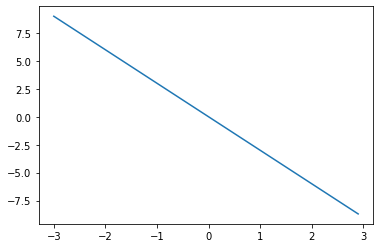

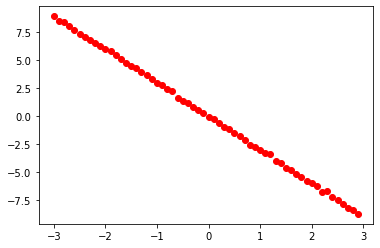

In [22]:
import matplotlib.pyplot as plt

plt.plot(X.numpy(), f.numpy())
plt.show()

Y = f + 0.1 * torch.randn(X.size())

plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.show()

In [26]:
def forward(x):
    return w * x

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [30]:
lr = 0.1
for epoch in range(4):
    Yhat = forward(X)
    loss = criterion(Yhat, Y)
    loss.backward()
    w.data = w.data - lr * w.grad.data
    w.grad.data.zero_()

In [32]:
b = torch.tensor(-10.0, requires_grad=True)

In [33]:
def forward(x):
    return w * x + b

In [34]:
lr = 0.1
for epoch in range(4):
    Yhat = forward(X)
    loss = criterion(Yhat, Y)
    loss.backward()
    w.data = w.data - lr * w.grad.data
    w.grad.data.zero_()
    b.data = b.data - lr * b.grad.data
    b.grad.data.zero_()

In [35]:
# stochastic gradient descent

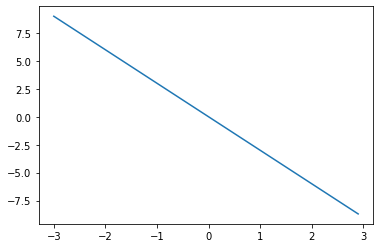

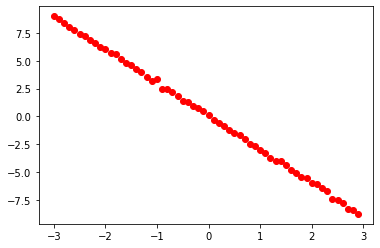

In [37]:
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

plt.plot(X.numpy(), f.numpy())
plt.show()

Y = f + 0.1 * torch.randn(X.size())

plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.show()

In [39]:
lr = 0.1
cost = []
for epoch in range(4):
    total = 0
    for x, y in zip(X, Y):
        Yhat = forward(x)
        loss = criterion(Yhat, y)
        loss.backward()
        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()
        b.data = b.data - lr * b.grad.data
        b.grad.data.zero_()
        total += loss.item()
    cost.append(total)

## Optimization 

In [41]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
lr = 0.1
cost = []
for epoch in range(4):
    total = 0
    for x, y in zip(X, Y):
        Yhat = forward(x)
        loss = criterion(Yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total += loss.item()
    cost.append(total)